<a href="https://colab.research.google.com/github/kimdahyeon977/DataScience/blob/master/LOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME ='kaggle'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/kaggle


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(font_scale=2)

In [ ]:
data=pd.read_csv('games/Games.csv')
data.shape

(26904, 50)

In [ ]:
data.head()
#카테고리 변수는 이미 one-hotencoding되어있다. 

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141


In [ ]:
data.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt'],
    

결측치 확인


In [ ]:
for col in data.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msperc)


column:     gameId	 Percent of NaN value: 0.00%
column: gameDuraton	 Percent of NaN value: 0.00%
column:   blueWins	 Percent of NaN value: 0.00%
column: blueFirstBlood	 Percent of NaN value: 0.00%
column: blueFirstTower	 Percent of NaN value: 0.00%
column: blueFirstBaron	 Percent of NaN value: 0.00%
column: blueFirstDragon	 Percent of NaN value: 0.00%
column: blueFirstInhibitor	 Percent of NaN value: 0.00%
column: blueDragonKills	 Percent of NaN value: 0.00%
column: blueBaronKills	 Percent of NaN value: 0.00%
column: blueTowerKills	 Percent of NaN value: 0.00%
column: blueInhibitorKills	 Percent of NaN value: 0.00%
column: blueWardPlaced	 Percent of NaN value: 0.00%
column: blueWardkills	 Percent of NaN value: 0.00%
column:  blueKills	 Percent of NaN value: 0.00%
column:  blueDeath	 Percent of NaN value: 0.00%
column: blueAssist	 Percent of NaN value: 0.00%
column: blueChampionDamageDealt	 Percent of NaN value: 0.00%
column: blueTotalGold	 Percent of NaN value: 0.00%
column: blueTotalM

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

In [ ]:

data.redFirstBlood=data.redFirstBlood.astype('category')
data.blueFirstBlood=data.blueFirstBlood.astype('category')
data.blueFirstTower=data.blueFirstTower.astype('category')
data.redFirstTower=data.redFirstTower.astype('category')
data.blueFirstInhibitor=data.blueFirstInhibitor.astype('category')
data.redFirstInhibitor=data.redFirstInhibitor.astype('category')
data.blueFirstBaron=data.blueFirstBaron.astype('category')
data.redFirstBaron=data.redFirstBaron.astype('category')
data.blueFirstDragon=data.blueFirstDragon.astype('category')
data.redFirstDragon=data.redFirstDragon.astype('category')

이미 정제되어 있는 데이터여서 0이 결측치인지 진짜 없는건지 알아봐야함.
bluedeath 와 redkill이 같은지 보면된다. 일치하지 않는데 0이면 이건 결측값이라는뜻!

In [ ]:
# sum=0
# for i in range(0,data.shape[0]):
#     sum++1 if data.iloc[i,:]['blueDeath']==data.iloc[i,:]['redKills'] else sum++0
#     sum++1 if data.iloc[i,:]['redDeath']==data.iloc[i,:]['blueKills'] else sum++0
#     sum++1 if data.iloc[i,:]['blueWins']+data.iloc[i,:]['redWins']!=1 else sum++0
# print(sum)

##데이터를 살펴보면 블루팀, 레드팀이 합쳐져 있는데 블루팀이 이기면 레드팀이 진것이므로 블루팀만 분석할 것이다.

In [ ]:
'blueWins'.startswith('blue')

True

In [ ]:
blue_columns=[]
red_columns=[]
for i in data.iloc[:,2:].columns:
  #print(i)
  blue_columns.append(i) if i.startswith('blue') else red_columns.append(i) 

In [ ]:
blue=pd.concat((data.iloc[:,0:2],data[blue_columns]),axis=1)
red=pd.concat((data.iloc[:,0:2],data[red_columns]),axis=1)

In [ ]:
data['kd']=data['blueKills']/data['blueDeath']
data['kda']=(data['blueKills']+data['blueAssist']/2)/data['blueDeath']
data['kad']=(data['blueKills']+data['blueAssist'])/data['blueDeath']

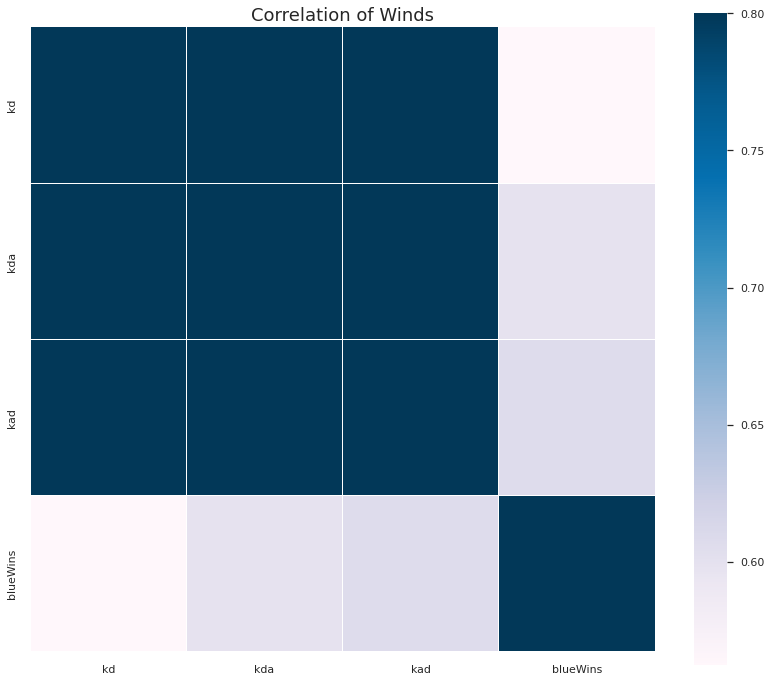

In [ ]:
corr_data2=data[['kd','kda','kad','blueWins']]
colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Winds',y=1,size=18)
sns.heatmap(corr_data2.corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8)

##EDA

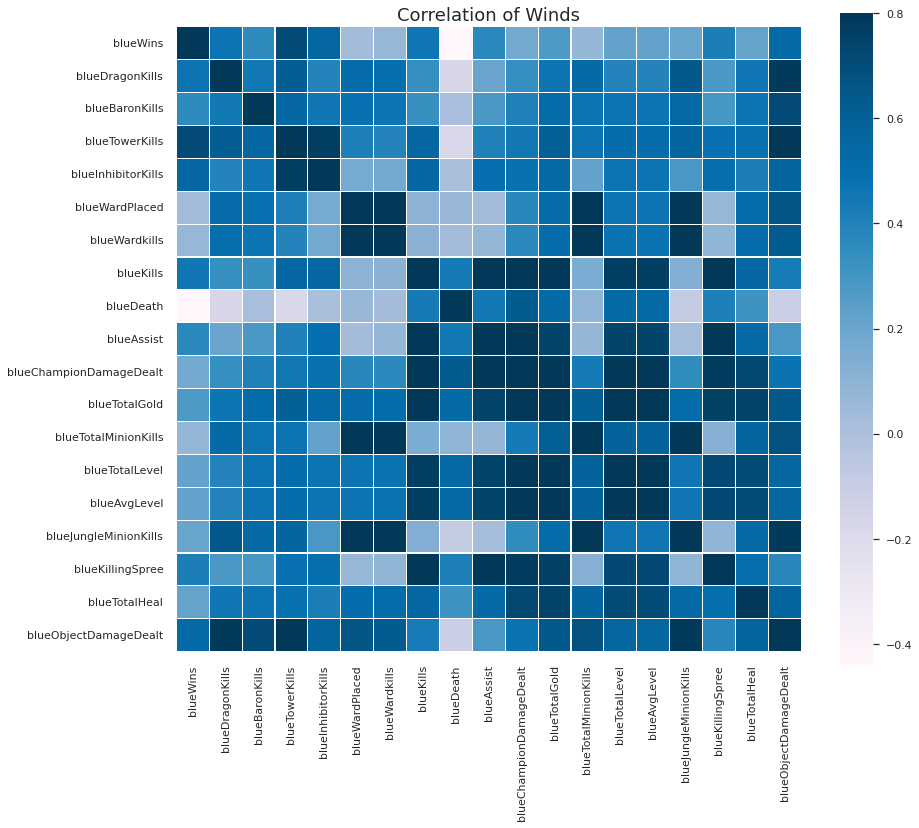

In [ ]:
#Correlation HeatMap 
corr_data = data[['blueWins',
'blueFirstBlood',
'blueFirstTower',
'blueFirstBaron',
'blueFirstDragon',
'blueFirstInhibitor',
'blueDragonKills',
'blueBaronKills',
'blueTowerKills',
'blueInhibitorKills',
'blueWardPlaced',
'blueWardkills',
'blueKills',
'blueDeath',
'blueAssist',
'blueChampionDamageDealt',
'blueTotalGold',
'blueTotalMinionKills',
'blueTotalLevel',
'blueAvgLevel',
'blueJungleMinionKills',
'blueKillingSpree',
'blueTotalHeal',
'blueObjectDamageDealt']] #모든 수치형 data

colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Winds',y=1,size=18)
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8)

다중공선성이 있는 변수들을 찾아보자 

(firstBaron, baronkills)
(firstDragon, dragonkills)
(firstRiftHerald,riftHeraldKills)

당연히 연관성이 있다. 두 변수 모두 중요해보이니 일단 냅둔다.

Index(['blueWins', 'blueTowerKills', 'blueInhibitorKills',
       'blueObjectDamageDealt', 'blueDragonKills', 'blueKills',
       'blueKillingSpree', 'blueAssist', 'blueBaronKills', 'blueTotalGold',
       'blueTotalLevel'],
      dtype='object')


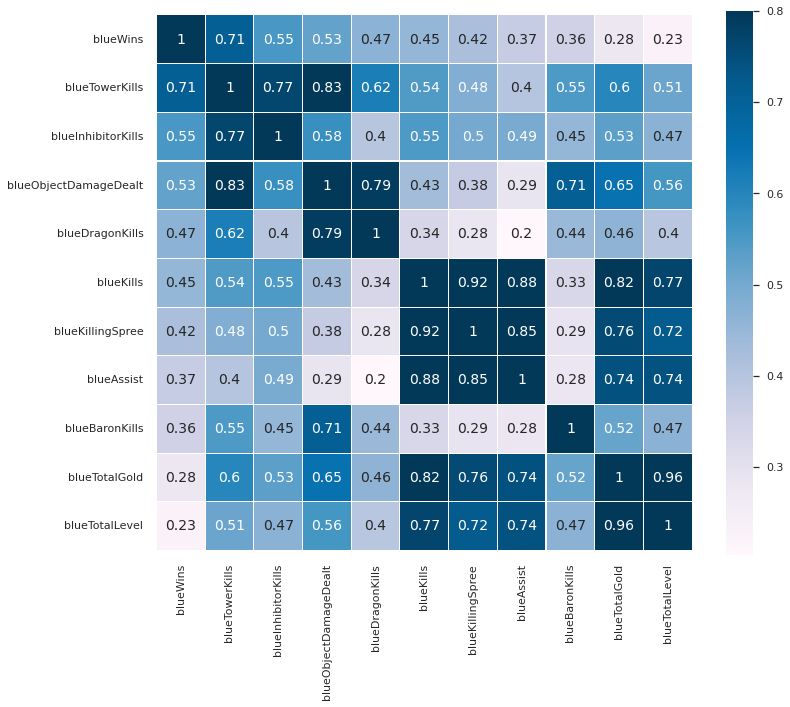

In [ ]:
#Zoomed Heat Map
k= 11
cols = corr_data.corr().nlargest(k,'blueWins')['blueWins'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)
#target과 가장 연관성이 높다고 할 수 있는 상위11개를 뽑았다.
#우리는 제일 연관성이 높은 GrLivArea는 살려두고 GarageCar가 더 target을 잘설명하므로 GarageArea를 버릴것이다.

##블루팀이 이겼을때 졌을때의 df를 따로 만들자

In [ ]:
# Separate winning and losing stats
win_stats = blue[blue["blueWins"] == 1]
loss_stats = blue[blue["blueWins"] == 0]

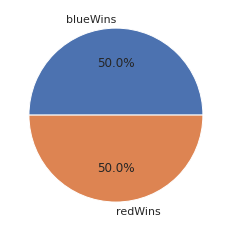

In [ ]:
#이긴횟수 분석을 통해 불균형 )데이터인지 확인 -> 아님
labels=data[['blueWins','redWins']].columns
frequency=[data[['blueWins']].sum(),data.shape[0]-data[['blueWins']].sum()]
plt.pie(frequency, labels=labels, autopct='%.1f%%')
plt.show()

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,15))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name+" Distribution")
        plt.tight_layout()
    
    plt.show()

In [ ]:
numerical_col_names = [c for c in blue.columns if blue[c].dtypes=='int']
numerical_col_names.pop(0)
numerical_col_names.pop(1)
numerical_stats = blue[numerical_col_names]
histogram_all = blue[numerical_col_names]
histogram_blue_win = win_stats[numerical_col_names]
histogram_blue_lose = loss_stats[numerical_col_names]
histogram_all.head()

,gameDuraton,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,1323,0,0,0,0,38,13,15,31,22,56039,37001,440,56,105,4,31035,5675
1,1317,2,0,4,0,57,18,19,8,31,60243,41072,531,63,111,3,26397,45303
2,932,0,0,0,0,28,7,5,20,8,24014,22929,306,42,64,0,6567,5651
3,2098,1,1,2,0,129,39,26,36,45,101607,63447,774,80,226,3,24718,31019
4,2344,2,2,11,3,114,35,27,40,47,134826,74955,831,83,252,5,37161,95287


In [ ]:
from matplotlib import pyplot
def compare_histograms(df1, df2, variables, n_rows, n_cols):
        fig=plt.figure(figsize=(15,15))
        for i, var_name in enumerate(variables):
            ax=fig.add_subplot(n_rows,n_cols,i+1)
            df1[var_name].hist(bins=20, ax=ax, label="Won") # for histogram
            df2[var_name].hist(bins=20, ax=ax, label="Lost") # for histogram
            ax.set_title(var_name+" Distribution")
            pyplot.legend(loc="upper right")
            plt.tight_layout()
        
        plt.show()

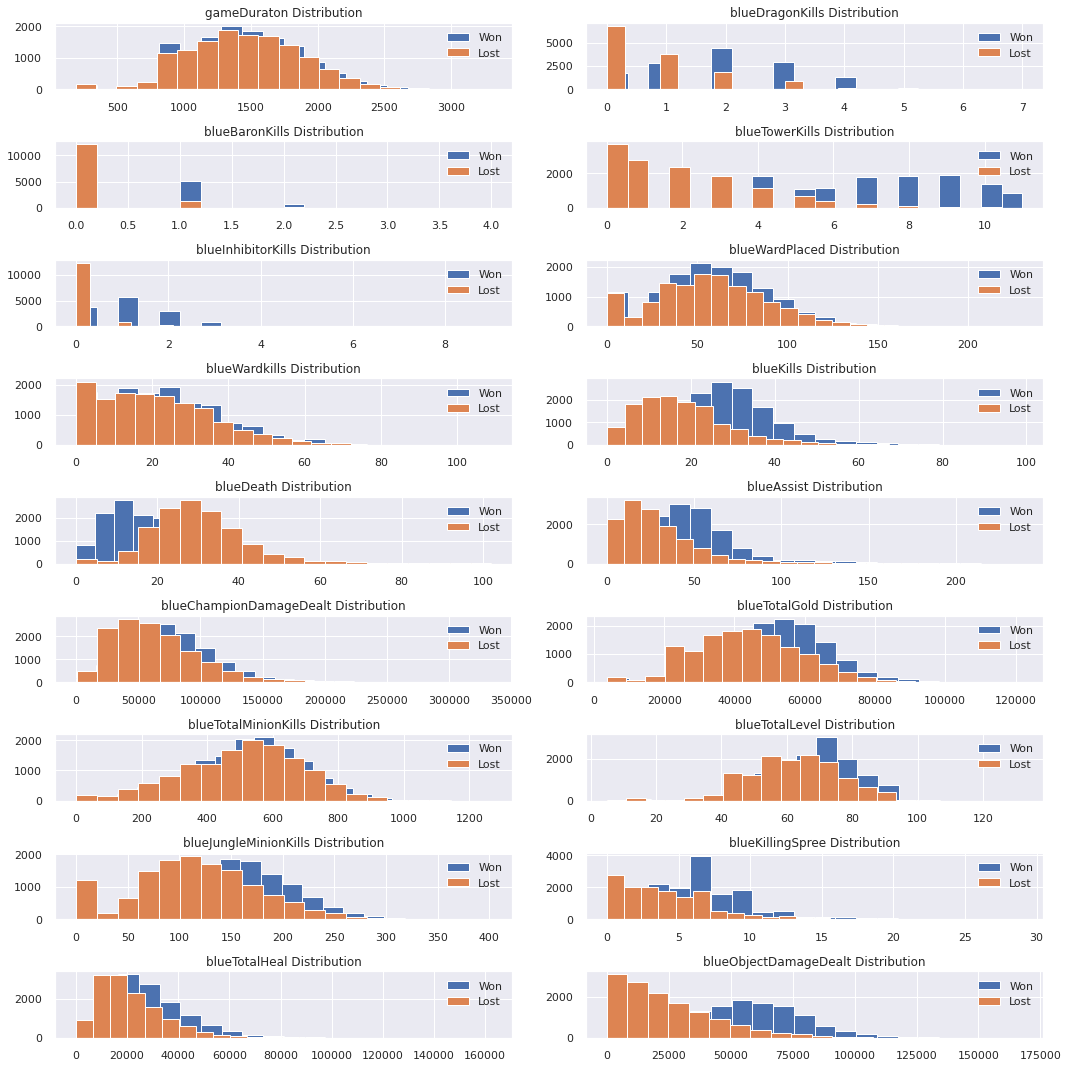

In [ ]:
compare_histograms(histogram_blue_win, histogram_blue_lose, histogram_blue_win, 9, 2)

blue death를 제외한 모든 변수들이 클수록 이길확률이 높다.

##범주형 시각화

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('0', '1'),
               (0.0, 0.0, 0.49743846926532964, 0.3989675060825748)),
              (('0', '0'),
               (0.0,
                0.40228976521878745,
                0.49743846926532964,
                0.5977102347812124)),
              (('1', '1'),
               (0.5024135936434391,
                0.0,
                0.49758640635656093,
                0.604718329022677)),
              (('1', '0'),
               (0.5024135936434391,
                0.6080405881588895,
                0.49758640635656093,
                0.39195941184111033))]))

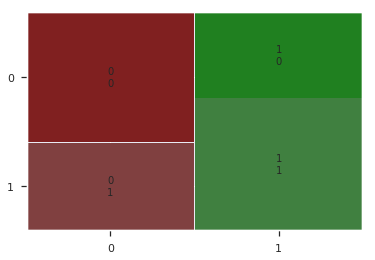

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['blueWins', 'blueFirstBlood'])

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('0', '0'),
               (0.0, 0.0, 0.49743846926532964, 0.9104225073793674)),
              (('0', '1'),
               (0.0,
                0.9137447665155799,
                0.49743846926532964,
                0.08625523348441995)),
              (('1', '0'),
               (0.5024135936434391,
                0.0,
                0.49758640635656093,
                0.5964213238958191)),
              (('1', '1'),
               (0.5024135936434391,
                0.5997435830320318,
                0.49758640635656093,
                0.4002564169679681))]))

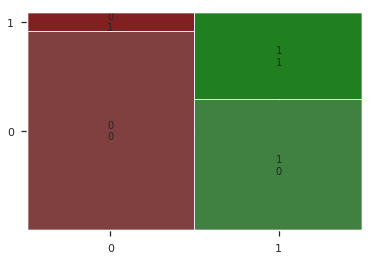

In [ ]:
mosaic(data, ['blueWins', 'blueFirstBaron'])

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('0', '0'),
               (0.0, 0.0, 0.49743846926532964, 0.7227951438204745)),
              (('0', '1'),
               (0.0,
                0.726117402956687,
                0.49743846926532964,
                0.2738825970433128)),
              (('1', '0'),
               (0.5024135936434391,
                0.0,
                0.49758640635656093,
                0.4606319453464419)),
              (('1', '1'),
               (0.5024135936434391,
                0.46395420448265456,
                0.49758640635656093,
                0.5360457955173454))]))

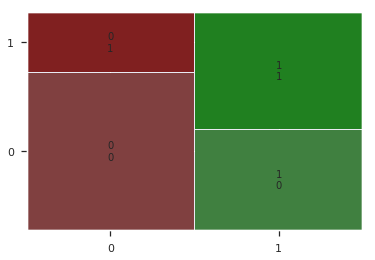

In [ ]:
mosaic(data, ['blueWins', 'blueFirstDragon'])

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('0', '0'), (0.0, 0.0, 0.49743846926532964, 0.937099383714755)),
              (('0', '1'),
               (0.0,
                0.9404216428509675,
                0.49743846926532964,
                0.05957835714903234)),
              (('1', '0'),
               (0.5024135936434391,
                0.0,
                0.49758640635656093,
                0.32454624518539116)),
              (('1', '1'),
               (0.5024135936434391,
                0.3278685043216038,
                0.49758640635656093,
                0.6721314956783961))]))

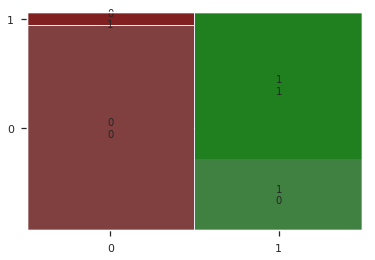

In [ ]:
mosaic(data, ['blueWins', 'blueFirstInhibitor'])

blueFirstDragon이지 않으면 대부분 패배

blueFirstInbitor이지 않으면 대부분 패배

범주형 변수들 중에서는 FirstInhibitor이 가장 유의해보인다.

In [ ]:
#파이프라인
def pipeline(df):
  df.redFirstBlood=df.redFirstBlood.astype('category')
  df.blueFirstBlood=df.blueFirstBlood.astype('category')
  df.blueFirstTower=df.blueFirstTower.astype('category')
  df.redFirstTower=df.redFirstTower.astype('category')
  df.blueFirstInhibitor=df.blueFirstInhibitor.astype('category')
  df.redFirstInhibitor=df.redFirstInhibitor.astype('category')
  df.blueFirstBaron=df.blueFirstBaron.astype('category')
  df.redFirstBaron=df.redFirstBaron.astype('category')
  df.blueFirstDragon=df.blueFirstDragon.astype('category')
  df.redFirstDragon=df.redFirstDragon.astype('category')
  blue_columns=[]
  red_columns=[]
  for i in data.iloc[:,2:].columns:
    blue_columns.append(i) if i.startswith('blue') else red_columns.append(i)
  blue=pd.concat((data.iloc[:,0:2],data[blue_columns]),axis=1)
  red=pd.concat((data.iloc[:,0:2],data[red_columns]),axis=1)
  return blue,red

In [ ]:
blue,red=pipeline(data)

#모델링

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting featuers and target
#blue=blue.drop('gameId',axis=1)
X = blue.drop('blueWins', axis=1)
y = blue['blueWins'].astype('category')

In [ ]:
np.random.rand(5)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics, svm
from sklearn.metrics import roc_auc_score
models = []
models.append(('Logistic', LogisticRegression()))
models.append(('DecisionTree', DecisionTreeClassifier()))  
models.append(('KNeighborsClassifier', KNeighborsClassifier()))  
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('XGB', XGBClassifier()))  # XGB 모델
models.append(('LGB', LGBMClassifier()))
models.append(('RendomForest',RandomForestClassifier()))
for name, model in models:
    accuracies = cross_val_score(estimator=model, X=x_train, y=y_train,cv=10)
    msg = "%s - auc_roc : %f" % (name, accuracies.mean())
    print(msg)

Logistic - auc_roc : 0.664085
DecisionTree - auc_roc : 0.953306
KNeighborsClassifier - auc_roc : 0.627886
LinearDiscriminantAnalysis - auc_roc : 0.964457
XGB - auc_roc : nan
LGB - auc_roc : 0.974818
RendomForest - auc_roc : 0.972866


##LGB와 랜포 선택

In [ ]:
lgb=LGBMClassifier()#Define the parameters

In [ ]:
parameters = {'num_leaves':[10,50,100,500,1000], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20], 'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}#Define the scoring

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
clf=GridSearchCV(lgb,parameters,scoring='accuracy') 
clf.fit(X=x_train, y=y_train)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [-1, 5, 10, 20],
                         'min_child_samples': [5, 10, 15],
                         'num_leaves': [10, 50, 100, 500, 1000],
                         'reg_alpha': [0, 0.01, 0.03]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_) 
predicted=clf.predict(x_test)

{'learning_rate': 0.2, 'max_depth': -1, 'min_child_samples': 5, 'num_leaves': 50, 'reg_alpha': 0.03}


In [ ]:
print('Classification of the result is:') 
print(accuracy_score(y_test, predicted))

Classification of the result is:
0.9721241404943319


In [ ]:
rf=RandomForestClassifier()

In [ ]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(rf,params,scoring='accuracy') 
clf.fit(X=x_train, y=y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_) 
predicted=clf.predict(x_test)

{'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
print('Classification of the result is:') 
print(accuracy_score(y_test, predicted))

Classification of the result is:
0.9665489685931983


In [ ]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
import multiprocessing
param_grid=[{
'learning_rate':[0.01,0.1,1,10,100],
'n_estimators':[0.01,0.1,1,10,100],
'subsample':[0.01,0.1,1,10,100]}]

In [ ]:
gs = GridSearchCV(
    estimator  = GradientBoostingClassifier(),
    param_grid=param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(x_train,y_train)
predict=gs.predict(x_test)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


In [ ]:
print('Classification of the result is:') 
print(accuracy_score(y_test, predict))

Classification of the result is:
0.9663631295298272


###3가지 지표만 (KD , KAD , KDA) 으로 비슷한 성능을 낼 수 있을까?

In [ ]:
data2=data[['kda','kd','kad','blueWins']]
data2_dop = data2.dropna(axis=0)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
X=clean_dataset(data2).drop('blueWins',axis=1)
y=clean_dataset(data2)['blueWins']

In [ ]:
np.random.rand(5)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.score(x_test,y_test)

0.945440956651719

## 결론 : 단 3개만으로도 충분하다!